In [3]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amreen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

unable to import 'smart_open.gcs', disabling that module


In [5]:
df = pd.read_csv('IMBD_most_popular_movies.csv')
df.head(5)

,Unnamed: 0,review_title,review,movie_name
0,0,Hate it but not cause it is bad.,I hated this movie because it hit me so hard. Lost my dad a while back and never dealt with all the things from that but this movie kinda drop kicked my feelings into the focus. Hard to watch a fi...,Onward-2020
1,1,Great film that doesn't have issues of other films,"The dead parent trope might be overused for Disney movies but Onward doesn't make the mistakes of those movies. The siblings fight like siblings though out, not just at plot critical moments. Thei...",Onward-2020
2,2,Movie for boys where the price is love - bravo Pixar,"Doing a fulfilling movie for boys where the price of the quest is emotional wholeness and found love is a rare sight and not an easy task. Pixar succeeded by providing rich brotherly relationship,...",Onward-2020
3,3,I very much enjoyed this movie,"WOW, Pixar is really moving onward with creativity and originality. While the story itself and plotting may suffer a few issues like predictibility at times, amazing animation and stunning visuals...",Onward-2020
4,4,Onward - Movie Review,"I was excited going into Onward because Pixar are one of the only studios making movies today that consistently deliver. Not all of them are as great as some of their classics, but I have never ha...",Onward-2020


In [6]:
#df['Text'] =  df['review_title'].str.cat(df['review'], sep =" ") 
df.head(5)

,Unnamed: 0,review_title,review,movie_name
0,0,Hate it but not cause it is bad.,I hated this movie because it hit me so hard. Lost my dad a while back and never dealt with all the things from that but this movie kinda drop kicked my feelings into the focus. Hard to watch a fi...,Onward-2020
1,1,Great film that doesn't have issues of other films,"The dead parent trope might be overused for Disney movies but Onward doesn't make the mistakes of those movies. The siblings fight like siblings though out, not just at plot critical moments. Thei...",Onward-2020
2,2,Movie for boys where the price is love - bravo Pixar,"Doing a fulfilling movie for boys where the price of the quest is emotional wholeness and found love is a rare sight and not an easy task. Pixar succeeded by providing rich brotherly relationship,...",Onward-2020
3,3,I very much enjoyed this movie,"WOW, Pixar is really moving onward with creativity and originality. While the story itself and plotting may suffer a few issues like predictibility at times, amazing animation and stunning visuals...",Onward-2020
4,4,Onward - Movie Review,"I was excited going into Onward because Pixar are one of the only studios making movies today that consistently deliver. Not all of them are as great as some of their classics, but I have never ha...",Onward-2020


In [9]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

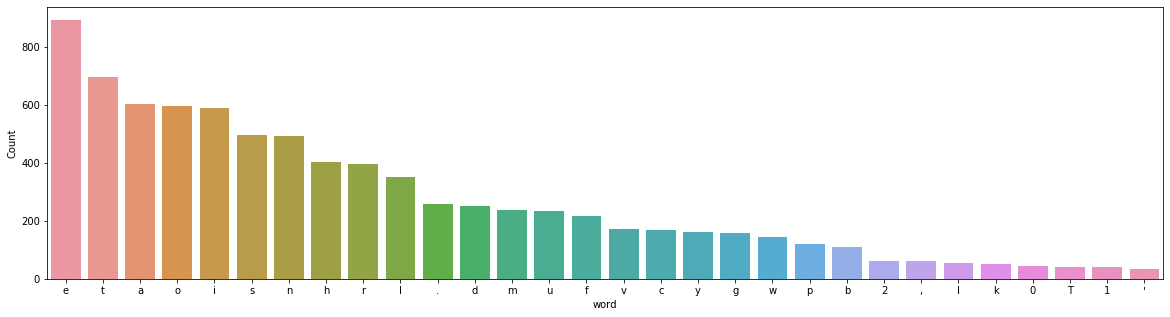

In [11]:
freq_words(str(df['review']))

In [12]:
# remove unwanted characters, numbers and symbols
df['Text'] = df['review'].str.replace("[^a-zA-Z#]", " ")
df['Text'] = re.sub(r"[0-9]","",str(df['Text']))

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [14]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['Text'] = df['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['Text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

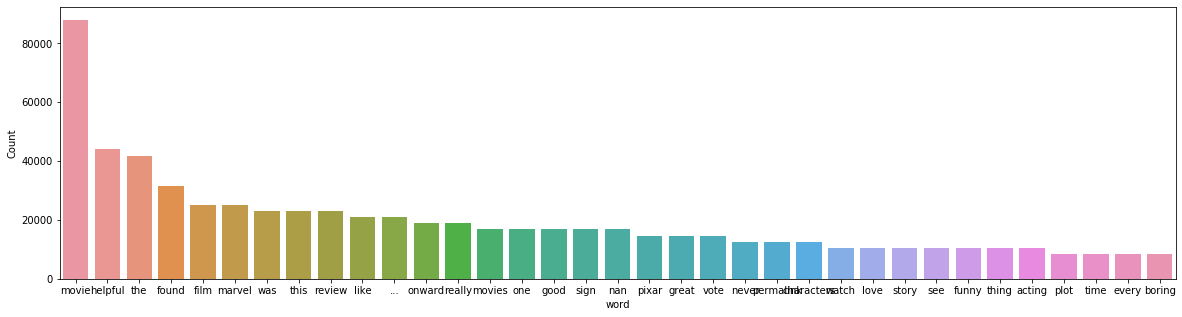

In [15]:
freq_words(reviews, 35)

In [16]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load(disable=['parser', 'ner'])

In [17]:
#nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [18]:
#Let’s tokenize the reviews and then lemmatize the tokenized reviews.

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['hated', 'movie', 'hit', 'hard', 'lost', 'dad', 'back', 'never', 'dealt', 'things', 'movie', 'kinda', 'drop', 'kicked', 'feelings', 'focus', 'hard', 'watch', 'fi...', 'the', 'dead', 'parent', 'trope', 'might', 'overused', 'disney', 'movies', 'onward', 'make', 'mistakes', 'movies', 'the', 'siblings', 'fight', 'like', 'siblings', 'though', 'plot', 'critical', 'moments', 'thei...', 'doing', 'fulfilling', 'movie', 'boys', 'price', 'quest', 'emotional', 'wholeness', 'found', 'love', 'rare', 'sight', 'easy', 'task', 'pixar', 'succeeded', 'providing', 'rich', 'brotherly', 'relationship', '...', 'wow', 'pixar', 'really', 'moving', 'onward', 'creativity', 'originality', 'while', 'story', 'plotting', 'may', 'suffer', 'issues', 'like', 'predictibility', 'times', 'amazing', 'animation', 'stunning', 'visuals...', 'excited', 'going', 'onward', 'pixar', 'one', 'studios', 'making', 'movies', 'today', 'consistently', 'deliver', 'not', 'great', 'classics', 'never', 'ha...', 'really', 'beautiful', 'emot

In [19]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['movie', 'dad', 'thing', 'movie', 'drop', 'feeling', 'watch', 'dead', 'parent', 'trope', 'movie', 'mistake', 'movie', 'sibling', 'sibling', 'plot', 'critical', 'moment', 'thei', 'fulfilling', 'movie', 'boy', 'price', 'emotional', 'wholeness', 'love', 'rare', 'sight', 'easy', 'task', 'rich', 'brotherly', 'relationship', 'onward', 'creativity', 'originality', 'story', 'plotting', 'issue', 'predictibility', 'time', 'amazing', 'animation', 'stunning', 'visual', 'excited', 'pixar', 'studio', 'movie', 'today', 'great', 'classic', 'beautiful', 'emotional', 'movie', 'fantastic', 'detailed', 'animation', 'use', 'color', 'magical', 'much', 'time', 'develope', 'movie', 'magical', 'good', 'family', 'movie', 'movie', 'great', 'cast', 'great', 'humor', 'great', 'movie', 'helpful', 'r', 'great', 'fantasy', 'adventure', 'magic', 'funny', 'incredible', 'perfect', 'onward', 'clutch', 'heart', 'string', 'minute', 'credit', 'possible', 'direction', 'process', 'film', 'typical', 'element', 'movie', 'flat'

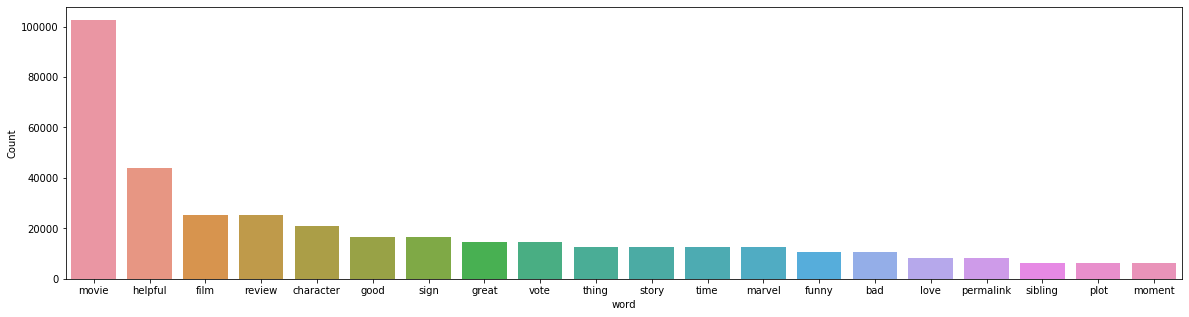

In [20]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 20)

**Building an LDA model:
We will start by creating the term dictionary of our corpus, where every unique term is assigned an index**



In [21]:
dictionary = corpora.Dictionary(reviews_2)

In [22]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [23]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50)

In [24]:
#Let’s print out the topics that our LDA model has learned.

lda_model.print_topics()

[(0,
  '0.111*"movie" + 0.039*"helpful" + 0.023*"review" + 0.023*"film" + 0.016*"marvel" + 0.015*"good" + 0.013*"character" + 0.013*"great" + 0.012*"vote" + 0.012*"sign"'),
 (1,
  '0.097*"movie" + 0.036*"helpful" + 0.027*"film" + 0.025*"review" + 0.020*"character" + 0.017*"sign" + 0.015*"vote" + 0.014*"good" + 0.012*"marvel" + 0.012*"thing"'),
 (2,
  '0.108*"movie" + 0.038*"helpful" + 0.022*"review" + 0.021*"film" + 0.020*"character" + 0.017*"sign" + 0.015*"good" + 0.015*"great" + 0.013*"story" + 0.012*"funny"'),
 (3,
  '0.104*"movie" + 0.032*"helpful" + 0.022*"review" + 0.020*"character" + 0.019*"film" + 0.016*"sign" + 0.015*"good" + 0.014*"great" + 0.013*"vote" + 0.011*"thing"'),
 (4,
  '0.081*"movie" + 0.040*"helpful" + 0.022*"review" + 0.022*"character" + 0.019*"film" + 0.016*"good" + 0.015*"story" + 0.014*"sign" + 0.013*"vote" + 0.013*"time"'),
 (5,
  '0.090*"movie" + 0.046*"helpful" + 0.023*"film" + 0.021*"review" + 0.017*"character" + 0.015*"vote" + 0.015*"good" + 0.015*"great" 

**Topics Visualization**
To visualize our topics in a 2-dimensional space we will use the pyLDAvis library. This visualization is interactive in nature and displays topics along with the most relevant words.



In [25]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\amreen\newpy\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.001807 -0.000102       1        1  10.088276
5      0.000755 -0.000132       2        1  10.047509
3     -0.001035  0.000448       3        1  10.033230
6      0.001928 -0.001621       4        1  10.022100
8      0.000819 -0.000385       5        1  10.015518
7      0.002037  0.003243       6        1  10.005572
1     -0.000957 -0.000654       7        1   9.969859
9     -0.000323 -0.002189       8        1   9.955847
2     -0.001384  0.000588       9        1   9.946140
0     -0.003648  0.000805      10        1   9.915938, topic_info=    Category           Freq         Term          Total  loglift  logprob
180  Default  102562.000000        movie  102562.000000  30.0000  30.0000
110  Default   25103.000000         film   25103.000000  29.0000  29.0000
132  Default   43978.000000      helpful   43978.000000  28.0000  28.0000
38   Default   20941.000000    character   20941.000000  27.0000  27.0000
244  Default   16754.000000         sign   16754.000000  26.0000  26.0000
266  Default   12564.000000         time   12564.000000  25.0000  25.0000
168  Default   12555.000000       marvel   12555.000000  24.0000  24.0000
120  Default   10473.000000        funny   10473.000000  23.0000  23.0000
126  Default   14653.000000        great   14653.000000  22.0000  22.0000
233  Default   25119.000000       review   25119.000000  21.0000  21.0000
265  Default   12567.000000        thing   12567.000000  20.0000  20.0000
249  Default   12561.000000        story   12561.000000  19.0000  19.0000
21   Default   10471.000000          bad   10471.000000  18.0000  18.0000
128  Default    6281.000000         half    6281.000000  17.0000  17.0000
165  Default    6280.000000         main    6280.000000  16.0000  16.0000
282  Default   14654.000000         vote   14654.000000  15.0000  15.0000
204  Default    6285.000000       people    6285.000000  14.0000  14.0000
124  Default   16747.000000         good   16747.000000  13.0000  13.0000
211  Default    6284.000000         plot    6284.000000  12.0000  12.0000
289  Default    4189.000000        whole    4189.000000  11.0000  11.0000
221  Default    4187.000000   production    4187.000000  10.0000  10.0000
248  Default    4188.000000         star    4188.000000   9.0000   9.0000
161  Default    8372.000000         love    8372.000000   8.0000   8.0000
187  Default    6283.000000        novel    6283.000000   7.0000   7.0000
25   Default    4188.000000          bit    4188.000000   6.0000   6.0000
23   Default    6280.000000    beautiful    6280.000000   5.0000   5.0000
247  Default    2094.000000      special    2094.000000   4.0000   4.0000
108  Default    4186.000000      feeling    4186.000000   3.0000   3.0000
206  Default    8379.000000    permalink    8379.000000   2.0000   2.0000
167  Default    6278.000000         many    6278.000000   1.0000   1.0000
..       ...            ...          ...            ...      ...      ...
13   Topic10     247.312805   attraction    2093.351562   0.1752  -6.0809
180  Topic10   11969.282227        movie  102562.015625   0.1629  -2.2015
177  Topic10     739.994019       moment    6280.354492   0.1725  -4.9849
161  Topic10     951.664856         love    8372.630859   0.1365  -4.7333
233  Topic10    2524.203125       review   25119.039062   0.0133  -3.7579
132  Topic10    4249.145020      helpful   43978.550781  -0.0260  -3.2371
110  Topic10    2455.763916         film   25103.779297  -0.0136  -3.7854
128  Topic10     677.786987         half    6281.538086   0.0845  -5.0727
120  Topic10    1073.436768        funny   10473.391602   0.0331  -4.6129
124  Topic10    1633.602051         good   16747.763672  -0.0165  -4.1930
249  Topic10    1235.153442        story   12561.478516  -0.0084  -4.4726
126  Topic10    1405.722290        great   14653.872070  -0.0331  -4.3432
171  Topic10     466.108398          mcu    4187.0507